This notebook is to create a dataset to be used to train a model for predicting images.  The dataset is a csv containing quotes that are read in then transformed and output to train.

Each image is assigned to an image.

In [1]:
!pip install matplotlib

In [2]:
import csv
import string
import pandas as pd

The csv is read into a dataframe

In [3]:
df = pd.read_csv('imagequotes.csv')

In [4]:
df.head()

,Image,Quote
0,1,As human beings our greatness lies not so muc...
1,1,We prefer world law in the age of self-determ...
2,1,Better pass boldly into that other world in t...
3,1,The credit of advancing science has always be...
4,1,It is well for the world that in most of us b...


In [5]:
import tensorflow as tf
import tensorflow_hub as hub

module_url = 'https://tfhub.dev/google/universal-sentence-encoder/4'
model = hub.load(module_url)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [6]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])


In [10]:
df['Vector'] = model(df['Quote'])

In [11]:
check = model(["As human beings our greatness lies not so much in being able to remake the world - that is the myth of the atomic age - as in being able to remake ourselves."])

In [12]:
dataset = pd.DataFrame(df['Vector'].tolist(), index=df.index)

In [13]:
from sklearn.model_selection import train_test_split

X = dataset
y = df['Image']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6292134831460674

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
y_pred_test = clf.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred_test)

0.6292134831460674

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

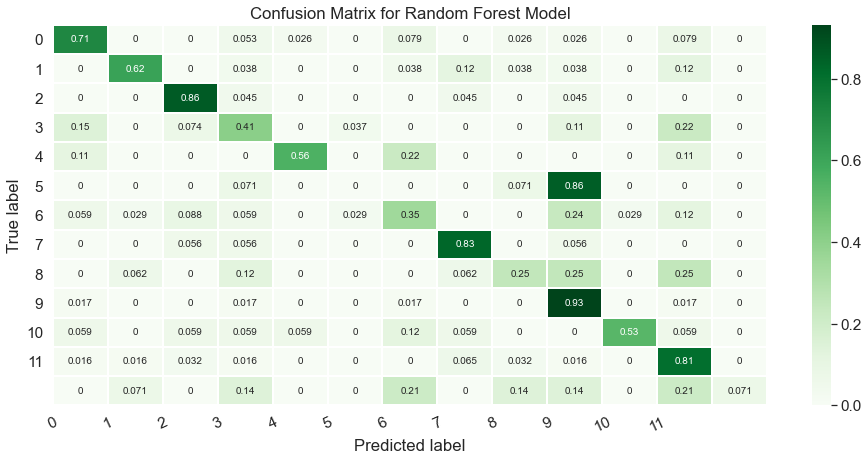

In [20]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = range(12)
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [21]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.73      0.71      0.72        38
           2       0.80      0.62      0.70        26
           3       0.68      0.86      0.76        22
           5       0.42      0.41      0.42        27
           6       0.71      0.56      0.63         9
           7       0.00      0.00      0.00        14
          12       0.50      0.35      0.41        34
          13       0.60      0.83      0.70        18
          15       0.36      0.25      0.30        16
          16       0.62      0.93      0.74        59
          17       0.90      0.53      0.67        17
          19       0.66      0.81      0.72        62
          21       1.00      0.07      0.13        14

    accuracy                           0.63       356
   macro avg       0.61      0.53      0.53       356
weighted avg       0.62      0.63      0.60       356



In [22]:
df['Quote'][0]

' As human beings our greatness lies not so much in being able to remake the world - that is the myth of the atomic age - as in being able to remake ourselves.'

In [43]:
y_test.head()

835     16
1030    19
508     12
1139    19
178      2
Name: Image, dtype: int64

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
knn_predictions = knn_classifier.predict(X_test)

In [26]:
knn_classifier.score(X_test, y_test)

0.6207865168539326

In [37]:
X_test.shape

(356, 512)

In [47]:
knn_classifier.predict([X_test.iloc[2]])

/Users/account1/GitRepos/imagequote/env/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array([5])

In [42]:
X_test.iloc[0]

0         tf.Tensor(0.03221137, shape=(), dtype=float32)
1       tf.Tensor(-0.099006355, shape=(), dtype=float32)
2       tf.Tensor(0.0027163187, shape=(), dtype=float32)
3        tf.Tensor(0.048378274, shape=(), dtype=float32)
4       tf.Tensor(-0.101552665, shape=(), dtype=float32)
                             ...                        
507     tf.Tensor(-0.039835583, shape=(), dtype=float32)
508     tf.Tensor(0.0104061365, shape=(), dtype=float32)
509    tf.Tensor(-0.0007329263, shape=(), dtype=float32)
510     tf.Tensor(0.0060962136, shape=(), dtype=float32)
511      tf.Tensor(0.012242761, shape=(), dtype=float32)
Name: 835, Length: 512, dtype: object

In [30]:
y_pred_test = knn_classifier.predict(X_test)

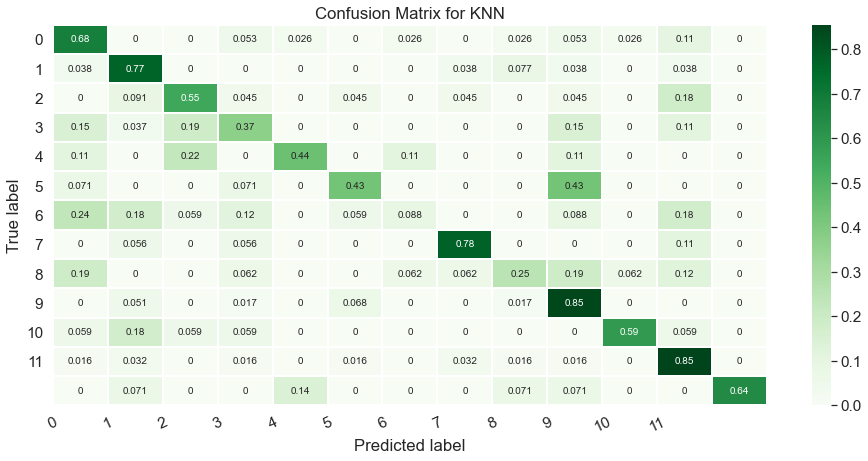

In [31]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = range(12)
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN')
plt.show()